![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "Sacramentorealestatetransactions.csv"

In [9]:
df = pd.read_csv(house_csv)

In [10]:
df.shape

(985, 12)

In [11]:
print(df.head())

             street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768  


In [12]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [13]:
#To have a brife overview of the whole data

df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [14]:
# Find the values which beds less than 1

df.loc[df['beds']<1, ['beds','baths','type','price']]

,beds,baths,type,price
73,0,0,Residential,206000
89,0,0,Residential,244500
100,0,0,Residential,263500
121,0,0,Residential,320000
126,0,0,Residential,339500
133,0,0,Residential,370000
147,0,0,Residential,445000
153,0,0,Residential,585000
169,0,0,Residential,97750
192,0,0,Condo,145000


In [15]:
# set-up the index of beds==0
drop_index = df[df['beds']==0].index
drop_index

Int64Index([ 73,  89, 100, 121, 126, 133, 147, 153, 169, 192,
            ...
            848, 859, 861, 862, 888, 901, 917, 934, 947, 970],
           dtype='int64', length=108)

In [16]:
# Drop the rows where beds == 0

df.drop(drop_index, inplace=True)

df[df['beds']==0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [17]:
# Check the data again
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1476.844926,239877.896237,38.590680,-121.362142
std,84.820726,0.864675,0.680771,760.257110,130165.212763,0.132885,0.137115
min,95603.000000,1.000000,1.000000,0.000000,1551.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1093.000000,150000.000000,38.477568,-121.448283
50%,95815.000000,3.000000,2.000000,1373.000000,215000.000000,38.618019,-121.386962
75%,95828.000000,4.000000,2.000000,1800.000000,297500.000000,38.684790,-121.310667
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [18]:
# Findout the sq__ft ==0, and try to clean the data.

df.loc[df['sq__ft'] ==0, ['beds', 'baths', 'sq__ft','price']]

,beds,baths,sq__ft,price
132,3,2,0,352000
154,4,3,0,600000
155,4,3,0,606238
157,6,5,0,830000
223,3,1,0,201000
224,4,2,0,202500
227,3,2,0,205000
230,2,2,0,210000
262,4,2,0,261800
278,4,4,0,297500


In [22]:
#group the sq__ft by beds and baths, replace the value by the median value according to the beds and baths.

df_group =df[['sq__ft','beds','baths']].groupby(['beds','baths']).median()

In [23]:
df_group

sq__ft
beds baths        
1    1       722.0
2    1       882.5
     2      1106.0
     3      1788.0
3    1      1082.0
     2      1362.0
     3      2006.5
     4      5822.0
4    1      1376.0
     2      1608.5
     3      2175.0
     4      2187.5
5    2      2254.0
     3      2787.0
     4      3384.0
     5      2846.0
6    3      2555.0
     4      2475.0
     5         0.0
8    4      3612.0

In [24]:
# Define the funtion to replace the value of sq_ft according to the beds and baths

def deal_sq_ft(cols):
    sq__ft = cols['sq__ft']
    beds = cols['beds']
    baths = cols['baths']
    
    if sq__ft ==0:

        if (beds == 1 & baths ==1):
            return 722
        if beds == 2:
            if baths ==1:
                return 882.5
            if baths ==2:
                return 1106.037037
            if baths ==3:
                return 1788.000000
        
        if beds == 3:
            if baths ==1:
                return 1082.269663
            if baths ==2:
                return 1362.987138
            if baths ==3:
                return 2006.5
            if baths ==4:
                return 5822.000000
            
        if beds == 4:
            if baths ==1:
                return 1376.0
            if baths ==2:
                return 1608.5
            if baths ==3:
                return 2175.0
            if baths ==4:
                return 2187.5
        
        if beds == 5:
            if baths ==2:
                return 2254.400000
            if baths ==3:
                return 2787
            if baths ==4:
                return 3384
            if baths ==5:
                return 2846.000000
            
        if beds == 6:
            if baths ==3:
                return 2555.000000
            if baths ==4:
                return 2475.000000
            if baths ==5:
                return 2795.000000
          
        if beds == 8:
            
            return 3612.000000
    else:
        return sq__ft
        

In [25]:
# Inplace the value of sq__ft according to different beds and baths

df['sq__ft'] = df[['sq__ft','beds','baths']].apply(deal_sq_ft, axis=1)

In [26]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1606.402905,239877.896237,38.590680,-121.362142
std,84.820726,0.864675,0.680771,661.153067,130165.212763,0.132885,0.137115
min,95603.000000,1.000000,1.000000,484.000000,1551.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1152.000000,150000.000000,38.477568,-121.448283
50%,95815.000000,3.000000,2.000000,1428.000000,215000.000000,38.618019,-121.386962
75%,95828.000000,4.000000,2.000000,1876.000000,297500.000000,38.684790,-121.310667
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [27]:
# ANSWER

#price is the target, always come to the end of columns and the independent value.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [28]:
# ANSWER

#beds, baths, sqft, Type

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [31]:
# ANSWER
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.072610,-0.119378,-0.099494,-0.217612,-0.205128,-0.534790
beds,-0.072610,1.000000,0.659514,0.710050,0.450966,-0.055823,0.077586
baths,-0.119378,0.659514,1.000000,0.732363,0.524377,-0.004684,0.156539
sq__ft,-0.099494,0.710050,0.732363,1.000000,0.660614,-0.061956,0.133299
price,-0.217612,0.450966,0.524377,0.660614,1.000000,0.131900,0.354499
latitude,-0.205128,-0.055823,-0.004684,-0.061956,0.131900,1.000000,0.392111
longitude,-0.534790,0.077586,0.156539,0.133299,0.354499,0.392111,1.000000


In [32]:
import myfunc_plotting

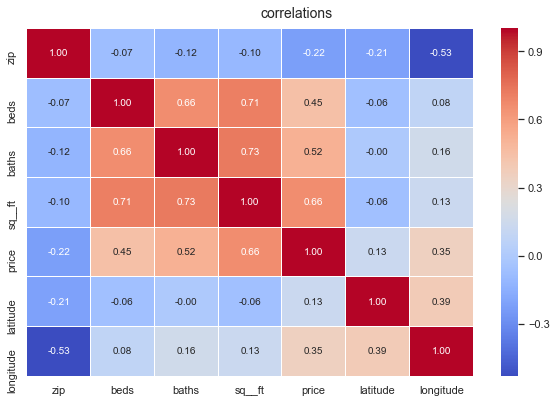

In [35]:
myfunc_plotting.heat_map_plot(df, 'correlations')

#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [36]:
from sklearn.linear_model import LinearRegression

##### 2.3.1 Fit predictor and target variables using linear regression 

In [37]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

In [47]:
#X

In [39]:
linr = LinearRegression()
linr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
print(f'linr.coef_, linr.intercept_ are: {linr.coef_} and {linr.intercept_}')

linr.coef_, linr.intercept_ are: [130.05917636] and 30950.45757312083


##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [43]:
# ANSWER
linr.score(X,Y)

0.43641148093721327

### 3. Splitting Data

In [44]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [45]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [46]:
# ANSWER
## Check training/test data
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows (701, 1)

Sample of X_train__________________________________________________
[[1690.]
 [1715.]
 [1092.]
 [ 888.]
 [1798.]
 [1683.]
 [1032.]
 [3173.]
 [ 972.]
 [1309.]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (701,)

Sample of y_train__________________________________________________
382    136500
978    230000
874     85500
962    216021
454    238861
514    365000
607     65000
849    525000
694    201000
897    131750
Name: price, dtype: int64


In [49]:
## Check training/test data

# About test
print('X_test is a %s' % type(X_test))
print('X_test has %d rows', X_test.shape)
print('')
print('Sample of X_test%s' % ('_'*50))
print(X_test[:10])

print('')
print('Y_test is a %s' % type(y_test))
print('y_test has %d rows', y_test.shape)
print('')
print('Sample of y_test%s' % ('_'*50))
print(y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test has %d rows (176, 1)

Sample of X_test__________________________________________________
[[2109.]
 [1304.]
 [2170.]
 [1315.]
 [1247.]
 [ 795.]
 [1209.]
 [1381.]
 [3389.]
 [ 760.]]

Y_test is a <class 'pandas.core.series.Series'>
y_test has %d rows (176,)

Sample of y_test__________________________________________________
802    330000
831    413500
259    257729
243    230000
313    445000
344     82732
380    130000
914    161250
301    370000
39     150000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [50]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[130.12624272] 30805.897372769978


In [51]:
linreg.score(X_test, y_test)

0.43531614904587346

In [74]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [52]:
linreg.intercept_, linreg.coef_

(30805.897372769978, array([130.12624272]))

In [53]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  187477.89361160493


In [54]:
# ANSWER
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  187477.89361160493
